In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("cc_train.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,9255,15601116,P'an,686,France,Male,32,6,0.00,2,1,1,179093.26,0,0,2,DIAMOND,510
1,1562,15766374,Leak,632,Germany,Male,42,4,119624.60,2,1,1,195978.86,0,0,4,PLATINUM,959
2,1671,15716994,Green,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,1,1,4,SILVER,327
3,6088,15730759,Chukwudi,561,France,Female,27,9,135637.00,1,1,0,153080.40,1,1,2,SILVER,567
4,6670,15797900,Chinomso,517,France,Male,56,9,142147.32,1,0,0,39488.04,1,1,3,PLATINUM,727


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           8000 non-null   int64  
 1   CustomerId          8000 non-null   int64  
 2   Surname             8000 non-null   object 
 3   CreditScore         8000 non-null   int64  
 4   Geography           8000 non-null   object 
 5   Gender              8000 non-null   object 
 6   Age                 8000 non-null   int64  
 7   Tenure              8000 non-null   int64  
 8   Balance             8000 non-null   float64
 9   NumOfProducts       8000 non-null   int64  
 10  HasCrCard           8000 non-null   int64  
 11  IsActiveMember      8000 non-null   int64  
 12  EstimatedSalary     8000 non-null   float64
 13  Exited              8000 non-null   int64  
 14  Complain            8000 non-null   int64  
 15  Satisfaction Score  8000 non-null   int64  
 16  Card T

In [6]:
df.shape

(8000, 18)

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5012.506875,1.569067e+07,651.647625,38.897750,5.003875,76102.139645,1.531375,0.703500,0.512750,100431.289764,0.205625,0.206375,3.011000,606.767000
std,2887.649416,7.184743e+04,96.366200,10.518953,2.881822,62461.005757,0.579705,0.456743,0.499869,57518.920431,0.404183,0.404728,1.404235,224.952574
min,2.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000,0.000000,1.000000,163.000000
25%,2512.750000,1.562822e+07,585.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51364.125000,0.000000,0.000000,2.000000,411.000000
50%,5014.500000,1.569074e+07,653.000000,37.000000,5.000000,96447.520000,1.000000,1.000000,1.000000,100487.720000,0.000000,0.000000,3.000000,604.000000
75%,7505.250000,1.575316e+07,719.000000,44.000000,7.000000,127611.332500,2.000000,1.000000,1.000000,149595.842500,0.000000,0.000000,4.000000,799.250000
max,10000.000000,1.581566e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000,1.000000,5.000000,1000.000000


# **Check for NULL Values**

---



In [9]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

# **Data Visualisation**

---



<Axes: xlabel='CreditScore', ylabel='Age'>

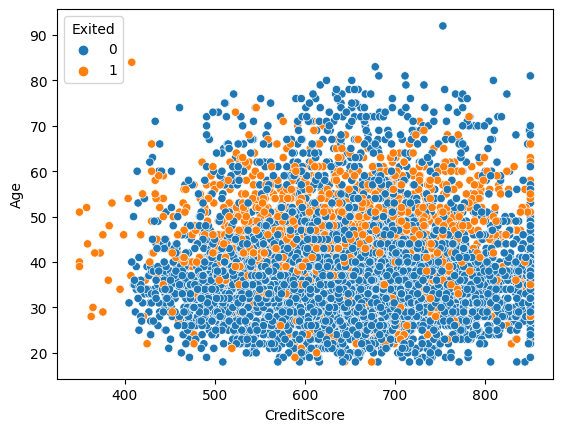

In [11]:
sns.scatterplot(x="CreditScore", y="Age", data=df, hue="Exited")

<Axes: xlabel='Gender', ylabel='count'>

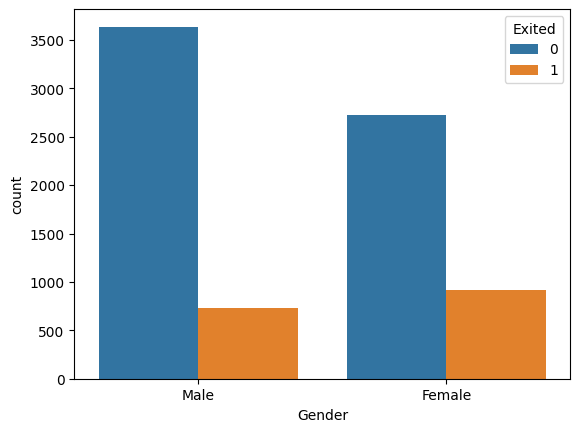

In [13]:
sns.countplot(x="Gender", data=df, hue="Exited")

<Axes: xlabel='HasCrCard', ylabel='count'>

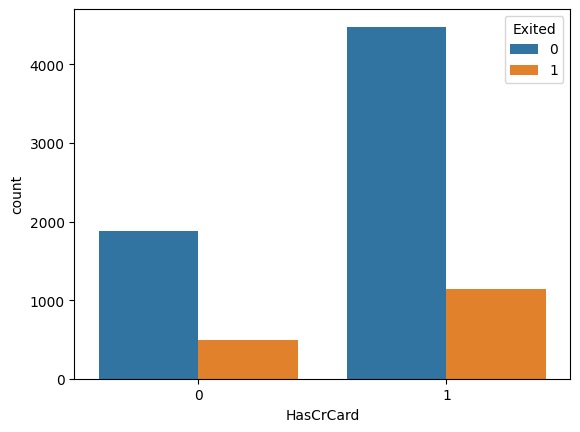

In [14]:
sns.countplot(x="HasCrCard", data=df, hue="Exited")

<Axes: >

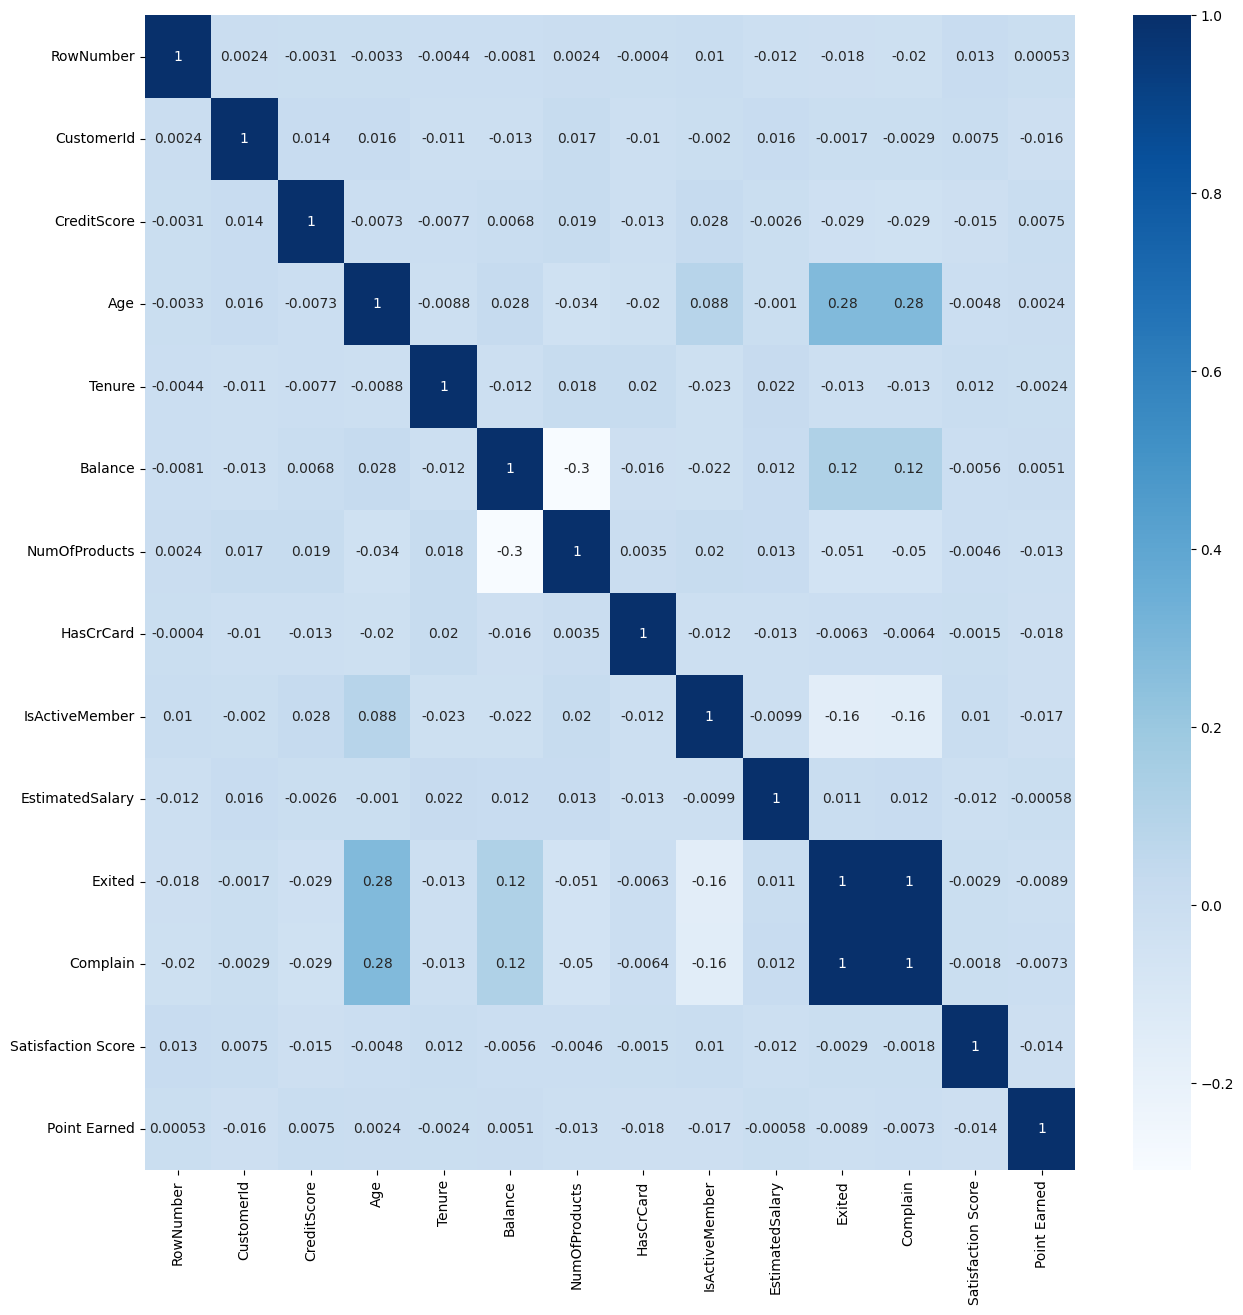

In [16]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap="Blues")

# **Seperating Dependent & Independent Variables**

---



In [20]:
drop_cols = ["RowNumber", "CustomerId", "Surname", "Exited"]

In [26]:
X = df.drop(drop_cols, axis=1)
y = df["Exited"]

In [22]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,686,France,Male,32,6,0.00,2,1,1,179093.26,0,2,DIAMOND,510
1,632,Germany,Male,42,4,119624.60,2,1,1,195978.86,0,4,PLATINUM,959
2,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,1,4,SILVER,327
3,561,France,Female,27,9,135637.00,1,1,0,153080.40,1,2,SILVER,567
4,517,France,Male,56,9,142147.32,1,0,0,39488.04,1,3,PLATINUM,727


In [23]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Exited, dtype: int64

# **Label Encoding**

---



In [24]:
from sklearn.preprocessing import LabelEncoder

In [27]:
cat_cols = dict()

for i in range(len(X.dtypes)):

  col = X.columns[i]
  if(X.dtypes[i] == object):

    print(col)
    cat_cols[col] = LabelEncoder()
    X[col] = cat_cols[col].fit_transform(X[col])

Geography
Gender
Card Type


# **Splitting into Training & Testing Set**

---



In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6400, 14)
(1600, 14)
(6400,)
(1600,)


# **Model Building - XGB Classifier**

---



In [32]:
from xgboost import XGBClassifier
xgbc_model = XGBClassifier()

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
xgbc_params = {'gamma' :[i/10.0 for i in range(0,5)],
               'max_depth' : [2,4,6,8,10,12,13,15],
               'min_child_weight':[1,2,5,10],
               'max_delta_step':[0,1,2,5,10],
               'subsample' :[i/10.0 for i in range(5,10)],
               'colsample_bytree' :[i/10.0 for i in range(5,10)],
               'colsample_bylevel' :[i/10.0 for i in range(5,10)],
               'n_estimators' : [100,150,200,300]
               }

In [35]:
xgbc_cv = RandomizedSearchCV(estimator=xgbc_model,
                            param_distributions=xgbc_params,
                            cv=10)

In [36]:
xgbc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bylevel': [0.5, 0.6, 0.7,
                                                              0.8, 0.9],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 13,
                                                      15],
                                        'min_child_weight': [1, 2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]})

In [37]:
xgbc_cv.best_params_

{'subsample': 0.7,
 'n_estimators': 200,
 'min_child_weight': 10,
 'max_depth': 13,
 'max_delta_step': 0,
 'gamma': 0.2,
 'colsample_bytree': 0.9,
 'colsample_bylevel': 0.6}

In [38]:
xgbc_model = XGBClassifier( subsample = 0.7,
                           n_estimators = 200,
                            min_child_weight = 10,
                            max_depth = 13,
                            max_delta_step = 0,
                            gamma = 0.2,
                            colsample_bytree = 0.9,
                            colsample_bylevel = 0.6
                            )

In [39]:
xgbc_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=13, max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [40]:
xgbc_model.score(X_test, y_test)

0.99875

# **Model Building - Random Forest Classifier**

---



In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
rfc_params = {'max_depth': list(range(10, 15)),
               'max_features': list(range(2,14))}

In [44]:
rfc_cv = RandomizedSearchCV(estimator=rfc_model,
                            param_distributions=rfc_params,
                            cv=10)

In [45]:
rfc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 11, 12, 13, 14],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13]})

In [46]:
rfc_cv.best_params_

{'max_features': 11, 'max_depth': 12}

In [47]:
rfc_model = RandomForestClassifier(
    max_features=11, max_depth=12
)

In [48]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=11)

In [49]:
rfc_model.score(X_test, y_test)

0.99875

# **Testing Data**

---



In [50]:
test_df = pd.read_csv("cc_test.csv")
test_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,6253,15687492,Anderson,596,Germany,Male,32,3,96709.07,2,0,0,41788.37,0,1,GOLD,709
1,4685,15736963,Herring,623,France,Male,43,1,0.00,2,1,1,146379.30,0,2,SILVER,508
2,1732,15721730,Amechi,601,Spain,Female,44,4,0.00,2,1,0,58561.31,0,1,GOLD,281
3,4743,15762134,Liang,506,Germany,Male,59,8,119152.10,2,1,1,170679.74,0,2,SILVER,979
4,4522,15648898,Chuang,560,Spain,Female,27,7,124995.98,1,1,1,114669.79,0,5,SILVER,457


In [51]:
test_df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [52]:
X_subs = test_df.drop(drop_cols[:-1], axis=1)

In [53]:
X_subs.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,596,Germany,Male,32,3,96709.07,2,0,0,41788.37,0,1,GOLD,709
1,623,France,Male,43,1,0.00,2,1,1,146379.30,0,2,SILVER,508
2,601,Spain,Female,44,4,0.00,2,1,0,58561.31,0,1,GOLD,281
3,506,Germany,Male,59,8,119152.10,2,1,1,170679.74,0,2,SILVER,979
4,560,Spain,Female,27,7,124995.98,1,1,1,114669.79,0,5,SILVER,457


In [54]:
for i in cat_cols:

  X_subs[i] = cat_cols[i].transform(X_subs[i])

In [55]:
X_subs.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,596,1,1,32,3,96709.07,2,0,0,41788.37,0,1,1,709
1,623,0,1,43,1,0.00,2,1,1,146379.30,0,2,3,508
2,601,2,0,44,4,0.00,2,1,0,58561.31,0,1,1,281
3,506,1,1,59,8,119152.10,2,1,1,170679.74,0,2,3,979
4,560,2,0,27,7,124995.98,1,1,1,114669.79,0,5,3,457


# **Submission File - 1**

---



In [56]:
y_subs1 = xgbc_model.predict(X_subs)

In [64]:
subs1_df = pd.DataFrame({
    "CustomerId": test_df["CustomerId"],
    "Churn": y_subs1
})

In [65]:
subs1_df.head()

,CustomerId,Churn
0,15687492,0
1,15736963,0
2,15721730,0
3,15762134,0
4,15648898,0


In [66]:
subs1_df.to_csv("submission1.csv", index=False)

# **Submission File - 2**

---



In [60]:
y_subs2 = rfc_model.predict(X_subs)

In [67]:
subs2_df = pd.DataFrame({
    "CustomerId": test_df["CustomerId"],
    "Churn": y_subs2
})

In [68]:
subs2_df.head()

,CustomerId,Churn
0,15687492,0
1,15736963,0
2,15721730,0
3,15762134,0
4,15648898,0


In [69]:
subs2_df.to_csv("submission2.csv", index=False)